# **Algoritma *K-Means***

## **Pengertian *K-Means Clustering***

**K-Means Clustering** adalah salah satu metode unsupervised learning dalam data mining dan machine learning yang digunakan untuk mengelompokkan data ke dalam beberapa cluster (kelompok) berdasarkan kesamaan atau kedekatan karakteristik (fitur) data tersebut.

## **Langkah-Langkah Algoritma K-Means**

1. Tentukan jumlah cluster (K) yang diinginkan.
2. Inisialnya K titik pusat (centroid) secara acak.
3. Update centeroid : Hitung ulang posisi centroid dari setiap cluster sebagai rata-rata dari titik-titik dalam cluster tersebut.
4. Ulang langkah 3 dan 4 sampai posisi centroid tidak banyak berubah atau mencapai batas iterasi tertentu.

## **Manfaat Clustering**

*   Clustering adalah teknik untuk membagi data ke dalam kelompok-kelompok yang mirip. Metode ini sangat bermanfaat dalam analisis dan prediksi berbagai persoalan bisnis, seperti segmentasi pelanggan, strategi pemesanan, dan pemetaan wilayah.
*   Clustering juga berguna untuk menganalisis objek di berbagai bidang, seperti pengolahan citra dan pengenalan pola dalam computer vision.

Hasil clustering yang efektif akan membentuk kelompok (cluster) yang memiliki kemiripan tinggi antar anggotanya, dan perbedaan yang jelas dengan anggota kelompok lain. Kemiripan ini biasanya diukur secara numerik—semakin mirip dua objek, maka nilainya semakin tinggi, begitu juga sebaliknya.
Kualitas dari hasil clustering sangat dipengaruhi oleh algoritma atau metode yang digunakan.



## **Inertia (Sum Square error/SSE)**

Dalam algoritma K-Means Clustering, inertia atau Sum Square Error (SSE) adalah ukuran yang digunakan untuk mengevaluasi seberapa baik data telah dikelompokkan ke dalam klaster.
Inertia mengukur total jarak kuadrat antara setiap titik data dengan pusat klaster (centroid) tempat data tersebut berada.

Semakin kecil nilai inertia, berarti data semakin dekat dengan pusat klasternya, dan pengelompokan dianggap semakin baik.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## **Silhouette Analysis**

Silhouette Analysis adalah metode evaluasi clustering yang sering dianggap lebih akurat dibandingkan inertia, terutama pada algoritma seperti K-Means.

Hal ini karena Silhouette memperhitungkan dua aspek penting sekaligus:
*   Kerapatan data dalam klaster itu sendiri
*   Jarak antara klaster yang berbeda

Silhouette mengukur seberapa cocok sebuah titik data berada di klasternya sekarang, dibandingkan jika titik tersebut ditempatkan di klaster lain yang paling dekat.
Nilai Silhouette menunjukkan seberapa baik sebuah data diposisikan dalam klaster yang sesuai.

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
*   $a(i)$: Rata-rata jarak dari titik data $i$ ke semua titik lain dalam klaster yang sama (mengukur kedekatan dalam klaster – cohesion).
*   $b(i)$: Rata-rata jarak dari titik $i$ ke seluruh titik di klaster terdekat lain yang bukan klasternya (mengukur pemisahan antar klaster – separation).
*   $s(i)$: Nilai silhouette score untuk titik $i$, dengan rentang antara -1 hingga 1.

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
*   ika $s(i) \approx 1$, berarti titik sangat cocok berada di klasternya dan jauh dari klaster lain.
*   ika $s(i) \approx 0$, berarti titik berada di antara dua klaster (tidak terlalu cocok).
*   Jika $s(i) \approx -1$, kemungkinan titik masuk ke klaster yang salah.

Untuk mengevaluasi keseluruhan hasil clustering, digunakan rata-rata dari semua nilai $s(i)$ pada seluruh data.

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data

## Menjelaskan code di bawah
Langkah awal menjelaskan bawa kode tersebut adalah perintah untuk menginstal dua pustaka libraries pyhton menggunkan pip, yaitu manajer paket untuk python.

- %pip install pymysql : Perintah ini menginstal pustaka pymsql. Pustaka ini digunakan untuk menghubungkan dan berinteraksi dengan database MySQL dari kode Pyhton.

- %pip install psycopg2 : Perintah ini menginstal pustaka psycopg2. Pustaka ini digunakan untuk menghubungkan dan berinteraksi dengan database PostgreSQL dari kode Pyhton.

In [ ]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Pengumpulan Data**

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3a2b4d8e-cahyanti625-f7a8.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_SEwXstfyAuXfxU81qVv",
        database="defaultdb",
        port=22424
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_sepal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-44ea6f9-cahyanti625-f7a8.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_Dp0q1x-sz9BpvjujgPO",
        database="iris",
        port=22424
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_petal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          64.0         45.0          63.0         53.0
  2     Iris-setosa          15.0         14.0          40.0         30.0
  3     Iris-setosa          26.0         64.0          57.0         42.0
  4     Iris-setosa          17.0         20.0          74.0         62.0
  5     Iris-setosa          24.0         30.0          21.0         45.0
  6     Iris-setosa           1.6          5.0           3.5          2.3
  7     Iris-setosa           1.9          0.4           2.1          3.2
  8     Iris-setosa           1.7          0.3           1.5          4.2
  9     Iris-setosa           1.6          5.0           3.4          5.2
 10     Iris-setosa           5.4          6.7           2.6          3.5
 11     Iris-setosa           7.5          6.3           6.2          5.4
 12     Iris-setosa           2.6          3.0           2.3          4.5
 13     Iris-setosa           1.7     

## **Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 2,3 dan 4**

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[-0.32247014 -0.31536724 -0.3060699  -0.27671225]
 [ 2.90223126  2.83830512  2.75462908  2.49041024]]
Akurasi (Adjusted Rand Score): -0.003

Hasil K-Means dengan 3 Klaster:
Centroids:
[[-0.32247014 -0.31536724 -0.3060699  -0.27671225]
 [ 2.90100945  2.65512034  2.74528182  1.88382699]
 [ 2.910173    4.02900619  2.81538626  6.43320134]]
Akurasi (Adjusted Rand Score): -0.002

Hasil K-Means dengan 4 Klaster:
Centroids:
[[-0.32247014 -0.31536724 -0.3060699  -0.27671225]
 [ 3.16629428  2.2967808   3.3242276   1.77775601]
 [ 2.910173    4.02900619  2.81538626  6.43320134]
 [ 2.0167267   3.84958548  0.81546256  2.2373969 ]]
Akurasi (Adjusted Rand Score): 0.001


## **Model Plotting dengan Jumlah Cluster 2, 3 dan 4**

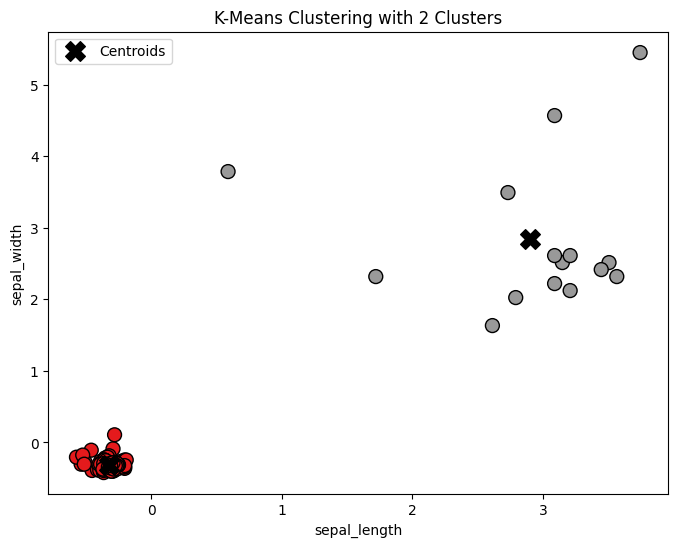

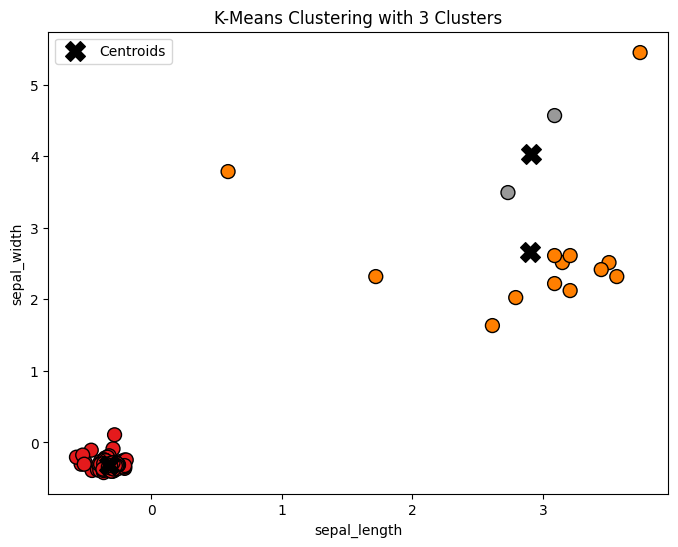

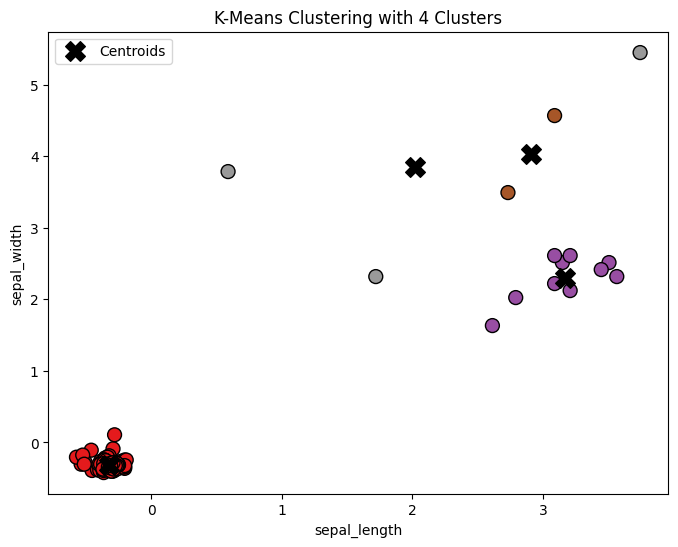

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means, plotting dan menampilkan centroid
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Plotting data dan centroid
    plt.figure(figsize=(8, 6))

    # Scatter plot untuk 2 fitur pertama (sepal length & sepal width)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', marker='o', edgecolors='k', s=100)

    # Plot centroid dengan warna berbeda
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Melakukan clustering dengan K=2, K=3, dan K=4 dan plot hasilnya
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)


## **Menghitung Inertia untuk Jumlah Cluster 2,3 dan 4**

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2
        inertia += distance
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 4. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 5. Jalankan untuk k=2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[-0.32247014 -0.31536724 -0.3060699  -0.27671225]
 [ 2.90223126  2.83830512  2.75462908  2.49041024]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [3.08886226 4.56726831 4.25836918 5.23138801]), Klaster: 1, Centroid: [2.90223126 2.83830512 2.75462908 2.49041024], Jarak kuadrat: 12.798, Inertia sementara: 12.798
Titik data 2 (Fitur: [1.71891127 2.31635397 0.53699217 1.30968135]), Klaster: 1, Centroid: [2.90223126 2.83830512 2.75462908 2.49041024], Jarak kuadrat: 7.985, Inertia sementara: 20.783
Titik data 3 (Fitur: [2.73148374 3.49074406 1.37240334 7.63501467]), Klaster: 1, Centroid: [2.90223126 2.83830512 2.75462908 2.49041024], Jarak kuadrat: 28.832, Inertia sementara: 49.615
Titik data 4 (Fitur: [3.74405622 5.44806088 0.68888511 2.06872135]), Klaster: 1, Centroid: [2.90223126 2.83830512 2.75462908 2.49041024], Jarak kuadrat: 11.965, Inertia sementara: 61.580
Titik data 5 (Fitur: [0.58721262 3.

## **Model Plotting Diagram Elbow Method**

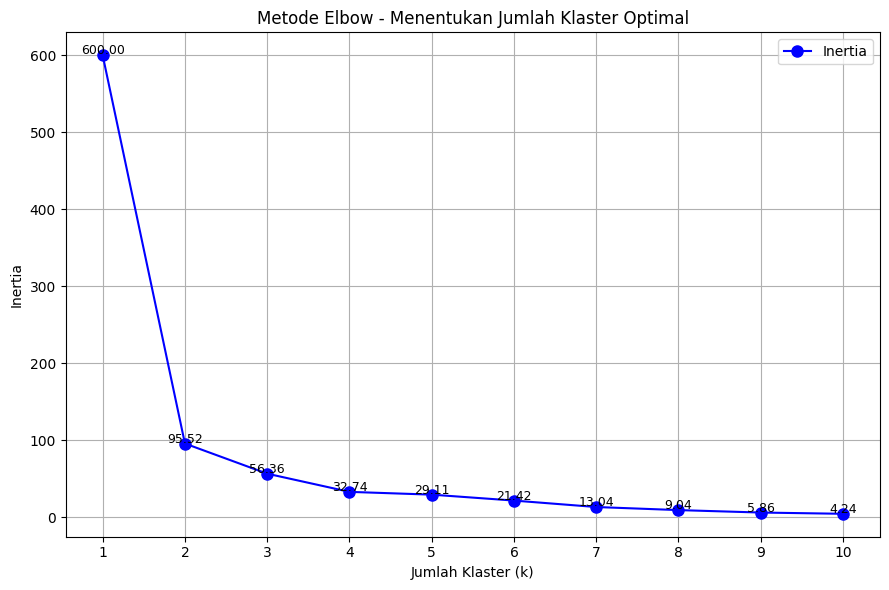

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

## **Menghitung Silhouette Score untuk Jumlah Cluster 2,3 dan 4**


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[-0.32247014 -0.31536724 -0.3060699  -0.27671225]
 [ 2.90223126  2.83830512  2.75462908  2.49041024]]
Silhouette Score untuk 2 klaster: 0.917

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[-0.32247014 -0.31536724 -0.3060699  -0.27671225]
 [ 2.90100945  2.65512034  2.74528182  1.88382699]
 [ 2.910173    4.02900619  2.81538626  6.43320134]]
Silhouette Score untuk 3 klaster: 0.913

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[-0.32247014 -0.31536724 -0.3060699  -0.27671225]
 [ 3.16629428  2.2967808   3.3242276   1.77775601]
 [ 2.910173    4.02900619  2.81538626  6.43320134]
 [ 2.0167267   3.84958548  0.81546256  2.2373969 ]]
Silhouette Score untuk 4 klaster: 0.912

>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = 2 (dengan score = 0.917)


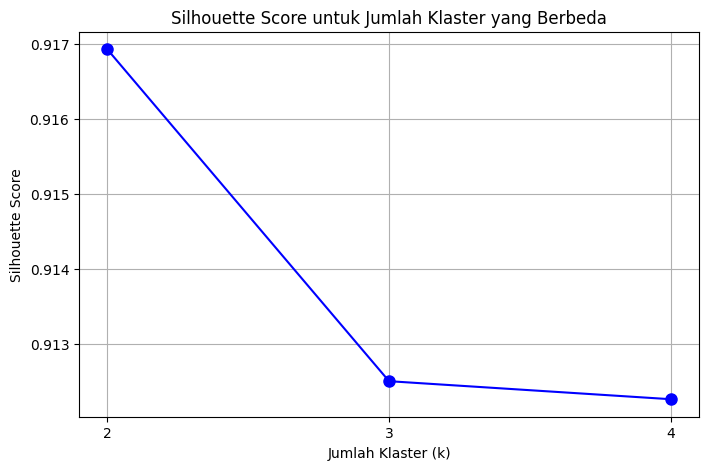

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means dan menghitung Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Output hasil untuk klaster k
    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Melakukan clustering dan menghitung Silhouette Score untuk k=2, 3, dan 4
silhouette_scores = []
k_values = [2, 3, 4]

for k in k_values:
    score = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(score)

# 5. Menentukan k dengan Silhouette Score terbaik
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = {best_k} (dengan score = {best_score:.3f})")

# 6. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()